## Project 2: Clustering + SVM to Predict Online Purchases 

### Author: Mahlet Melese & Sweety Saha
### Date: July 25, 2023

## 1.  Introduction

- The primary objective of this project is to perform clustering to create groupings of similar data observations within the provided data set, apply labels to the data observations assigned to those groupings and construct an SVM model to predict the most likely categorization of any previously unseen data items. In addition, we will apply a hierarchical clustering algorithm and create elbow and silhouette plots for the data to select an appropriate K value. Next, we used a K-means clustering algorithm to the data set using a value of K=2 to group the data into two clusters.
- The data set is comprised of more than 12,000 observations with 17 attributes and an additional class label which will initially be separate from the data set.
- The data is sourced [here.](https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset#).


### Import Libraries

In [2]:
#Import libraries and packages
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
import matplotlib.pyplot as plt 
plt.rc("font", size=14)


C:\Users\suraf\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


## 2. Exploratory Data Analysis

#### Part 1. Read dataset from my github  repo and creat pandas dataframe

In [3]:
# Downloading the csv file from my GitHub repo
data_url = "https://raw.githubusercontent.com/mahletbirku/-DAV-6150/main/Project2_Data.csv" 
df = pd.read_csv(data_url, header=0)
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0,0.00,0,0.0,8,222.000000,0.000000,0.028571,53.474571,0.0,May,1,1,1,2,New_Visitor,True
1,0,0.00,0,0.0,14,1037.500000,0.014286,0.047619,0.000000,0.0,Mar,2,2,4,2,Returning_Visitor,False
2,4,37.50,2,82.0,4,96.625000,0.000000,0.017500,0.000000,0.0,Nov,2,2,9,2,New_Visitor,False
3,4,115.70,0,0.0,16,655.383333,0.000000,0.012037,0.000000,0.0,Nov,1,1,2,3,Returning_Visitor,False
4,1,60.00,1,15.0,26,670.166667,0.000000,0.003846,0.000000,0.0,May,2,2,3,4,Returning_Visitor,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,148.00,0,0.0,8,292.500000,0.000000,0.027273,0.000000,0.0,Mar,2,2,1,3,Returning_Visitor,True
12326,1,9.00,1,29.5,23,1157.583333,0.007692,0.053846,0.000000,0.0,Nov,2,2,7,2,Returning_Visitor,False
12327,0,0.00,0,0.0,91,4157.633333,0.010000,0.028013,0.000000,0.0,Jul,2,2,1,13,Returning_Visitor,False
12328,0,0.00,0,0.0,38,1417.666667,0.016117,0.048718,0.000000,1.0,May,2,6,3,6,Returning_Visitor,True


In [6]:
# what is the dimensionality of the data?
df.shape

(12330, 17)

#### Description for 16 Attribute 
| Columns| Description |
|:------:|-|
| INDEX |  Unique ID | 
| Administrative | the number of Administrative pages visited by the visitor in that session (numeric, discrete)  | 
|Administrative_Duration|total time spent in Administrative page categories (numeric, continuous)|
|Informational|the number of Informational pages visited by the visitor in that session (numeric, discrete)|
|Informational_Duration|total time spent in Informational page categories (numeric, continuous)|
|ProductRelated|the number of ProductRelated pages visited by the visitor in that session (numeric, discrete)| 
|ProductRelated_Duration|total time spent in ProductRelated page categories (numeric, continuous)|
|BounceRates| percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session (numeric, continuous)|
|ExitRates| calculated as for all pageviews to the page, the percentage that were the last in the session (numeric, continuous)|
|PageValues| average value for a web page that a user visited before completing an e-commerce transaction (numeric, continuous)| 
|SpecialDay|the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentine’s Day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8. (numeric, continuous)|
|Month|month the site was visited (categorical)|
|OperatingSystems| value of 1 - 8 (categorical)| 
|Browser| value of 1 - 13 (categorical)| 
|Region| value of 1 - 9 (categorical)|
|TrafficType| value of 1 - 10 (categorical)| 
|VisitorType| returning visitor, new visitor, or other (categorical)|
| Weekend| a Boolean value, either true or false, indicating whether the date of the visit is weekend (categorical)|
| Revenue| the class label, either true or false, that tells if the user made a purchase (categorical)|



####  Let's check if there is a missing value
Before answering those questions below , I checked null valus which is a fundamental part of data cleaning.

In [7]:
# recommended code 
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
dtype: int64

We have no missing values in our data set.

#### Data types of all columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

We have 12,330 observations with several different data types such as integers, floating points, objects, and Boolean.



In [6]:
#Find the number of unique values for each variable
df.nunique(axis=0)

Administrative               27
Administrative_Duration    3335
Informational                17
Informational_Duration     1258
ProductRelated              311
ProductRelated_Duration    9551
BounceRates                1872
ExitRates                  4777
PageValues                 2704
SpecialDay                    6
Month                        10
OperatingSystems              8
Browser                      13
Region                        9
TrafficType                  20
VisitorType                   3
Weekend                       2
dtype: int64

We notice that some variables only have a few values such as 2 for Weekend, 3 for VistorType, 6 for SpecialDay, 8 for OperatingSystmes, and 9 for Region.

In [7]:
#Check for duplicates
dups = df[df.duplicated()]
dups

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
92,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Nov,2,2,1,1,Returning_Visitor,False
975,0,0.0,0,0.0,2,0.0,0.2,0.2,0.0,0.0,Mar,1,1,1,1,Returning_Visitor,False
2006,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Dec,2,2,8,1,Returning_Visitor,False
2174,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Nov,1,1,4,1,Returning_Visitor,False
2221,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Nov,2,2,1,1,Returning_Visitor,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12121,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,June,3,2,3,13,Returning_Visitor,False
12164,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Dec,2,2,1,3,Returning_Visitor,False
12170,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Mar,2,2,2,1,Returning_Visitor,False
12276,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Nov,1,1,3,3,Returning_Visitor,False


Although there are 125 duplicate rows, according to the duplication check, they don't appear to be precise duplicates. We will leave these rows in the data set because 125 out of 12,330 is around 1% of the total.

Weekend attribute True/False values should be changed to 1/0.



In [8]:
#Change the data type to int
df['Weekend'] = df.Weekend.astype(int)

#Replace True/False with 1/0
df = df.replace(to_replace = ['True','False'],value = [1,0])

#View the data frame to ensure the changes were made
df.head()



,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0,0.0,0,0.0,8,222.000000,0.000000,0.028571,53.474571,0.0,May,1,1,1,2,New_Visitor,1
1,0,0.0,0,0.0,14,1037.500000,0.014286,0.047619,0.000000,0.0,Mar,2,2,4,2,Returning_Visitor,0
2,4,37.5,2,82.0,4,96.625000,0.000000,0.017500,0.000000,0.0,Nov,2,2,9,2,New_Visitor,0
3,4,115.7,0,0.0,16,655.383333,0.000000,0.012037,0.000000,0.0,Nov,1,1,2,3,Returning_Visitor,0
4,1,60.0,1,15.0,26,670.166667,0.000000,0.003846,0.000000,0.0,May,2,2,3,4,Returning_Visitor,0


Let's now take a closer look at the categories qualities and numerical attributes.

In [9]:
#Create lists of numerical and categorical attributes

col_cat=['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend']

col_num=['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 
         'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']

print("No. of categorical attributes:%s" %len(col_cat))
print("No. of numerical attributes:%s" %len(col_num))

No. of categorical attributes:7
No. of numerical attributes:10


In [4]:
#Find the count, mean, standard deviation, minimum, maximum, 25%, 50% and 75% of each variable in the dataset.
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


There is a lot of variation in the magnitude of our data set. The smallest mean is the BounceRate with 0.022 and the largest is ProductRelated_Duration with a mean of 1,195. There is also a wide range between mins and maxs. The lowest min is 0 and the highest max is 63,973.

## Histograms, Bar Charts, Boxplots and Correlation Matrix

Plot a histogram for each of our numerical attributes.

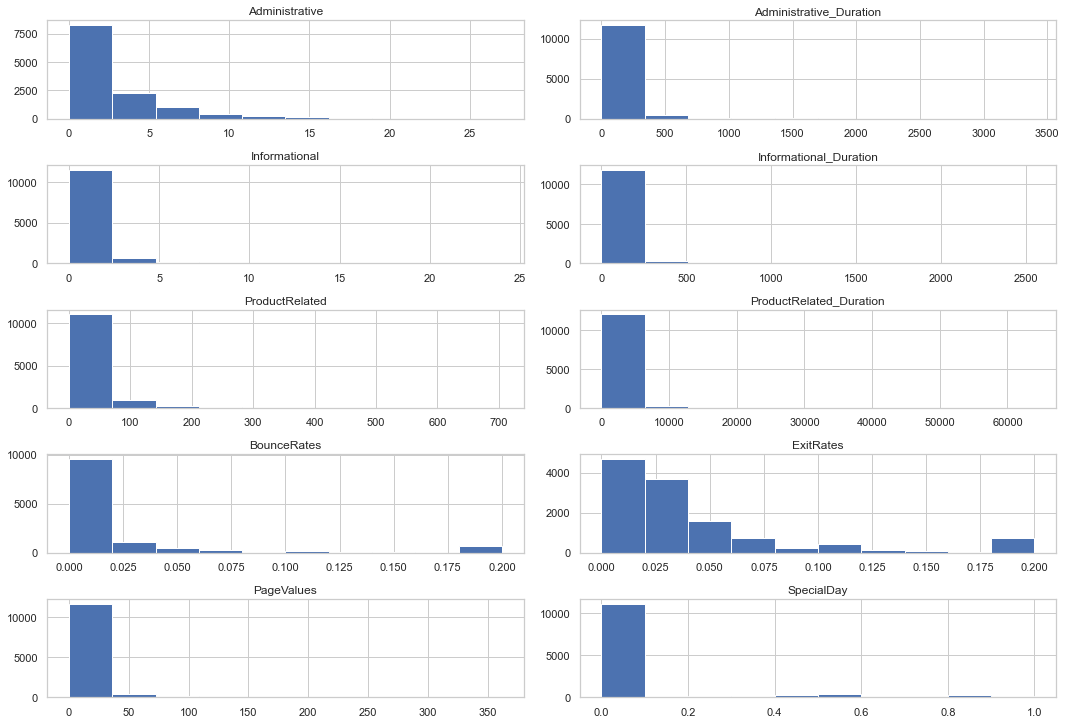

In [10]:
#Set plot parameters
plt.rcParams.update({'font.size': 12,'figure.figsize':(15,20)}) 

#Ignore warnings
np.warnings.filterwarnings('ignore')

#Use an index to identify the spot of the subplot
j=1

#For each numerical column 
for k in col_num :   
    plt.subplot(10,2,j) 
    plt.hist(df[k])
    plt.title('%s' %k)
    j=j+1 

plt.tight_layout()

#Show results    
plt.show()

The histograms are right-skewed.

* Administrative has 27 unique values with a mode of 0, a median of , and a mean of 2.32.
* Administrative_Duration has 3,335 unique values with a mode of 0, a median of 7.5, and a mean of 80.82.
* Informational has 17 unique values with a mode of 0, a median of 0, and a mean of 0.5.
* Informational_Duration has 1,258 unique values with a mode of 0, a median of 0, and a mean of 34.47.
* ProductRelated has 311 unique values with a mode of 1, a median of 18, and a mean of 31.73.
* ProductRelated_Duration has 9,551 unique values with a mode of 0, a median of 598.94, and a mean of 1.194.75.
* BounceRates has 1,872 unique values with a mode of 0, a median of 0, and a mean of 0.02.
* ExitRates has 4,777 unique values with a mode of 0.2, a median of 0.03, and a mean of 0.04.
* PageValues has 2,704 unique values with a mode of 0, a median of 0, and a mean of 5.89.
* SpecialDay has 6 unique values with a mode of 0, a median of 0, and a mean of 0.06.



Check the boxplots for outliers.

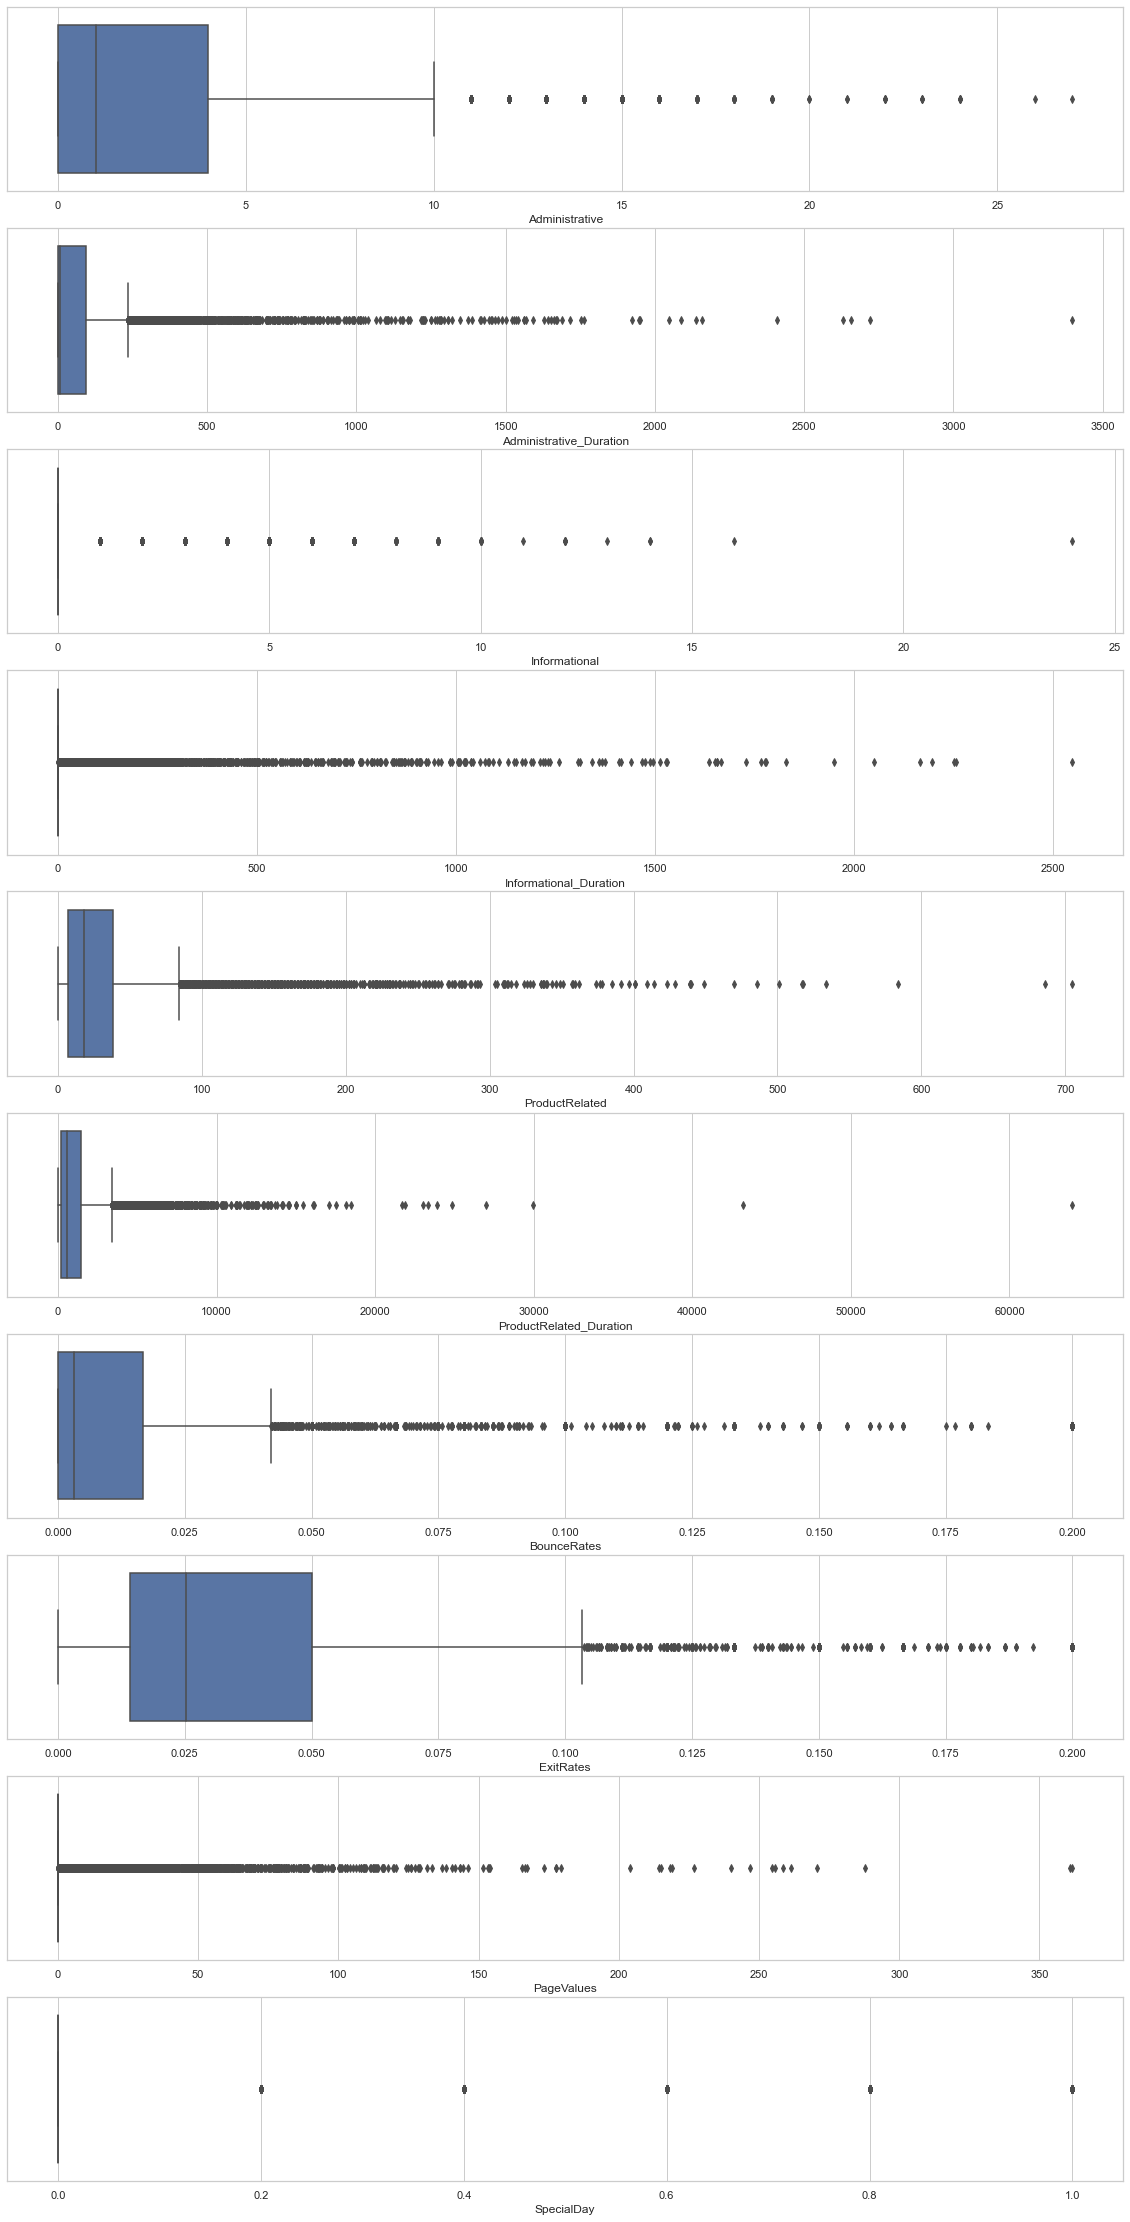

In [11]:
#Define a figure to which we will add a boxplot for each of our attributes
plt.figure(figsize=(20,40))

#Ignore warnings
np.warnings.filterwarnings('ignore')

#Use an index to identify the spot of the subplot
j=1

#For each numeric variable display a boxplot
for k in col_num :    
    plt.subplot(10,1,j) 
    sns.boxplot(x=k, data=df);
    j=j+1

#Show results    
plt.show()

* Administrative's median value is 1. Q1 to Q3 is 0 - 4 with outliers from 11 to 27.
* Administrative_Duration's median value is 7.5. Q1 to Q3 is 0 - 93 with outliers from 94 to 3398.75.
* Informational's median value is 0. Q1 to Q3 is 0 with outliers from 1 to 24.
* Informational_Duration's median value is 0. Q1 to Q3 is 0 with outliers from 1 to 2549.375.
* ProductRelated's median value is 18. Q1 to Q3 is 7 - 38 with outliers from about 80 to 705. 
* ProductRelated_Duration's median value is 598.93. Q1 to Q3 is 184.08 to 1464.26 with outliers from about 4,000 to 63,973.52.
* BounceRates's median value is 0.0031. Q1 to Q3 is 0 to 0.017 with outliers from 0.04 to 0.2.
* ExitRates's median value is 0.25. Q1 to Q3 is 0.014 to 0.05 with outliers from 0.105 to 0.2.
* PageValues's median value is 0. Q1 to Q3 is 0 with outliers from 0.04 to 361.76. 
* SpecialDay's median value is 0. Q1 to Q3 is 0 with outliers from 0.2 to 1.

Check the correlation matrix to see if any of the numeric values are highly correlated.

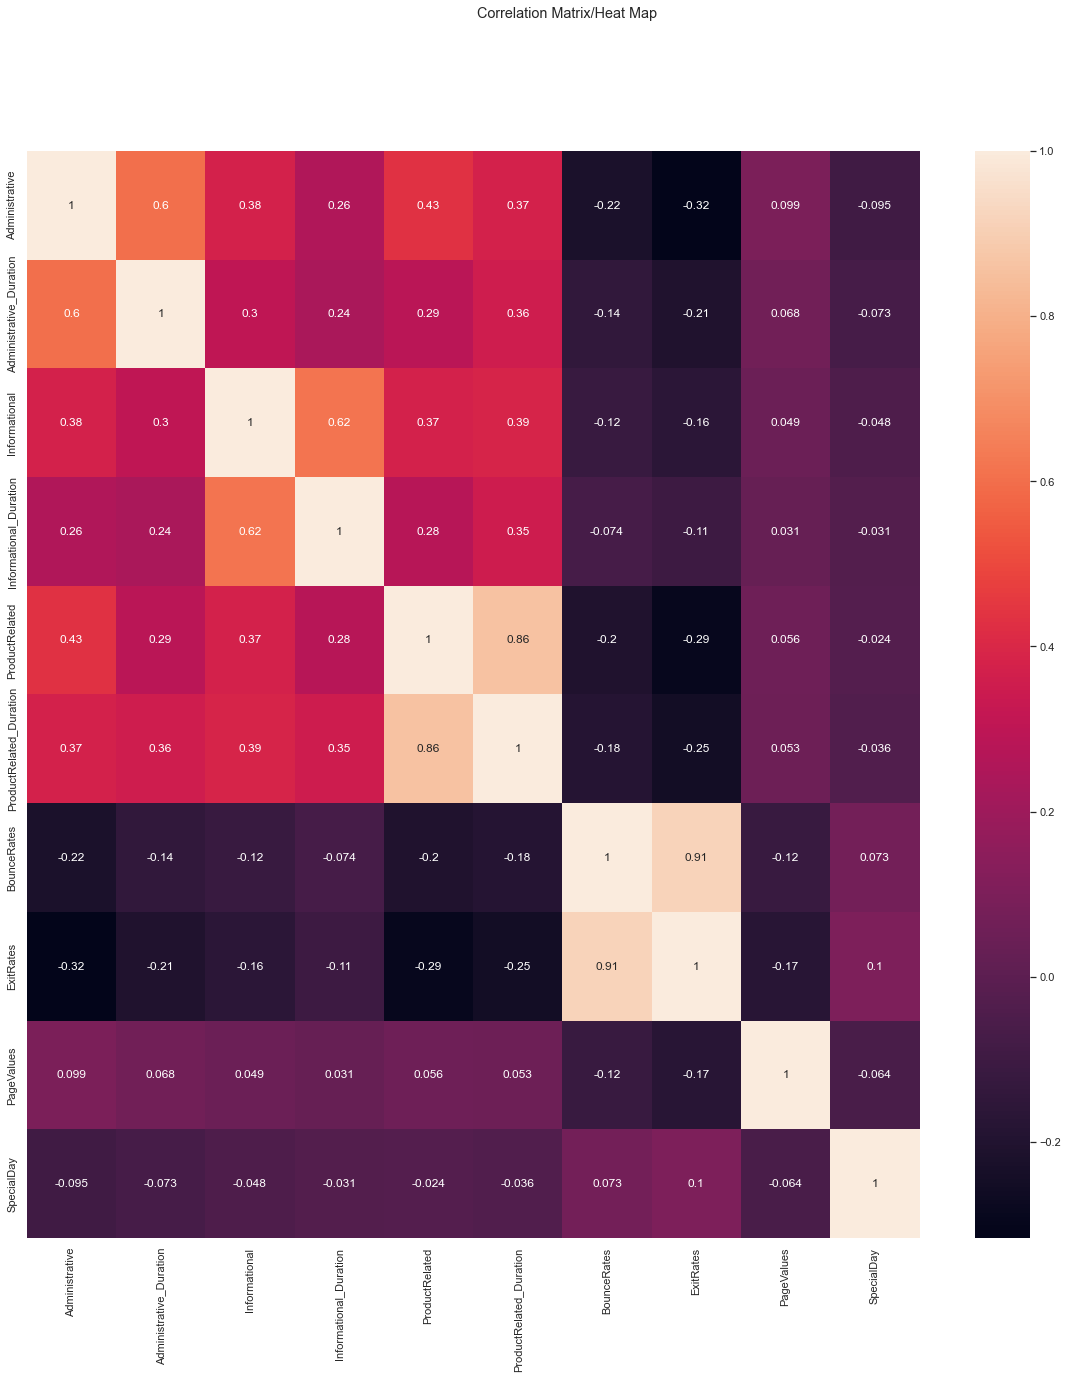

In [13]:
#Graph heat map for correlation
corr_num=df[col_num].corr()
fig = plt.figure(figsize=(20, 20))
sns.heatmap(corr_num, annot=True);
fig.suptitle('Correlation Matrix/Heat Map') 
plt.show()

BounceRates and ExitRates are highly correlated at 0.91.

ProductRelated and ProductRelated_Duration are highly correlated at 0.86.

Plot a bar chart for each of the categorical attributes.

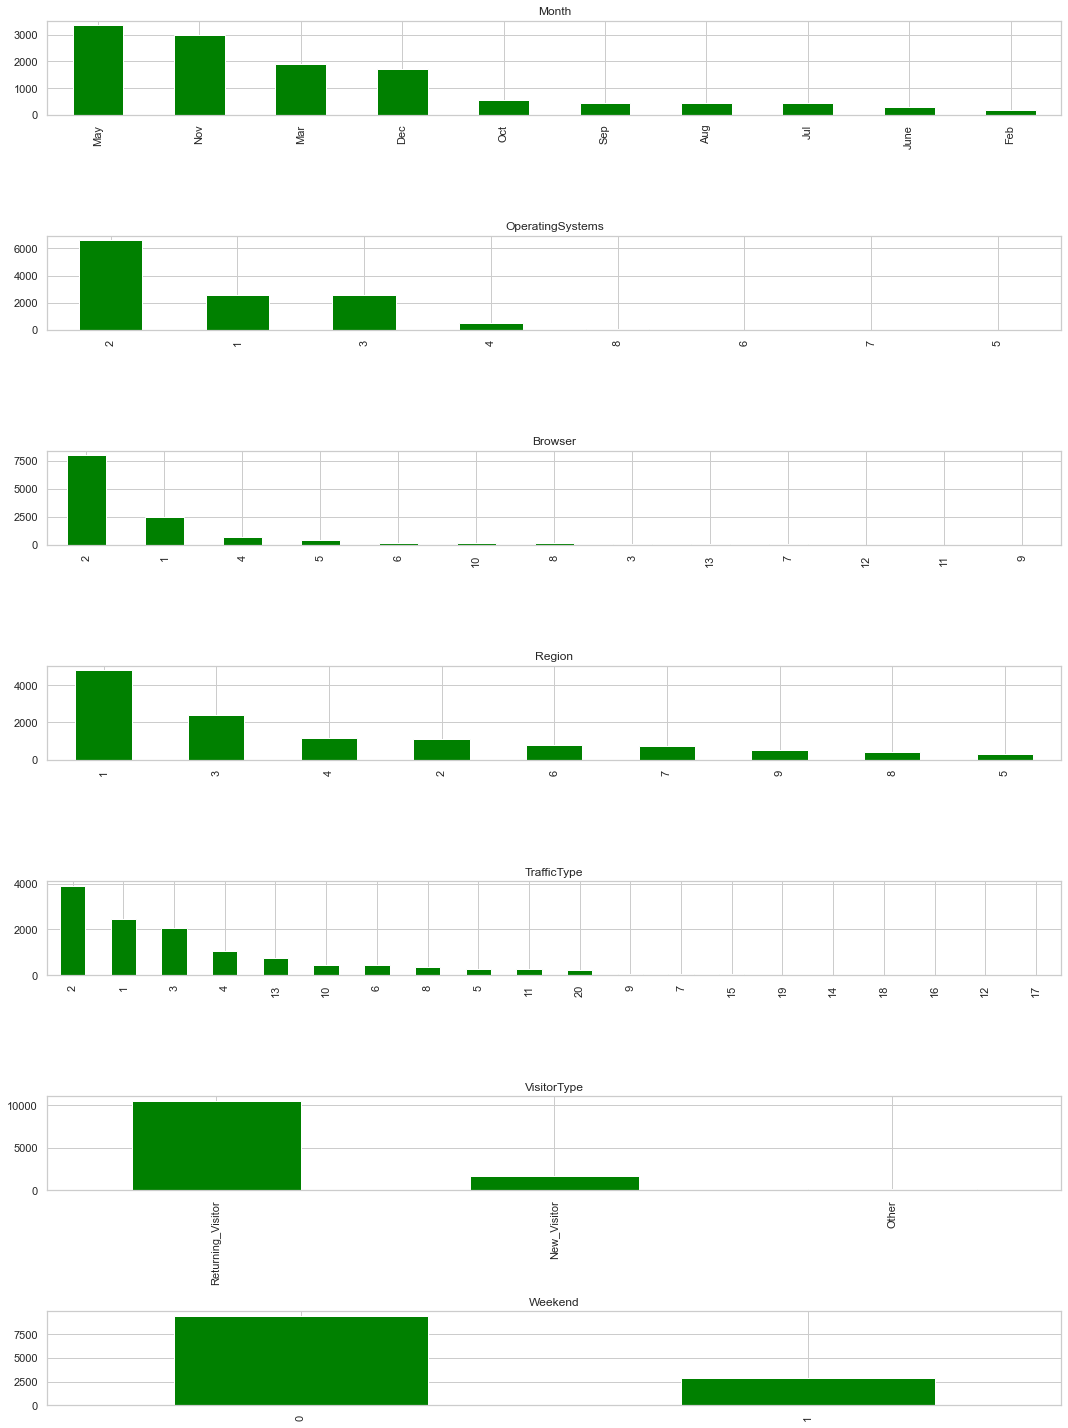

In [14]:
#Use an index to identify the spot of the subplot
j=1

#For each categorical column 
for k in col_cat :   
    plt.subplot(7,1,j) 
    df[k].value_counts().plot(kind='bar', color='green');
    plt.title('%s' %k)
    
#Add 1 to go to the next subplot space
    j=j+1 

plt.tight_layout()

#Show results    
plt.show()

* The most common observations for Month is May with 27%, Novemeber with 24%, March with 15%, and December with 14%. The other months, October, September, August, July, June, and February have between 1% and 4%. There are no values for January or April. 
* The most common observations for OperatingSystems is 2 with 54%, 1 with 21%, 3 with 21%, and 4 with 4%. Other OperatingSystems, 5 - 8, are about 1% each.
* The most common observations for Browser is 2 with 65%, 1 with 20%, 4 with 6% and 5 with 4%. The other browsers, 3, 6, 7, 8, 9, 10, 11, 12 and 13, have between 0.01% and 1%. 
* The most common observations for Region is 1 with 39%, 3 with 19%, 4 with 10%, and 2 with 9. The other regions, 5, 6, 7, 8, and 9, have between 3% and 7%. 
* The most common observations for TrafficType are 2 with 32%, 1 with 20%, 3 with 17% and 4 with 9%. The other traffic types, 5-20, have between 0.01% and 6% 
* The most common observation for VisitorType is 86% for returning vistors. New visitors was 14% and other was almost 1%.
* The most common observation for Weekend was the 0 indicator with 77%. The 1 indicator had 23%.

## Pre-Clustering Data Preparation

Drop numeric attributes that are strongly correlated with other attributes.

In [15]:
#Drop ProductRelated_Duration and BounceRate
df = df.drop(df.columns[[5, 6]], axis=1)
              
#View the data frame to ensure that the columns were removed
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0,0.0,0,0.0,8,0.028571,53.474571,0.0,May,1,1,1,2,New_Visitor,1
1,0,0.0,0,0.0,14,0.047619,0.000000,0.0,Mar,2,2,4,2,Returning_Visitor,0
2,4,37.5,2,82.0,4,0.017500,0.000000,0.0,Nov,2,2,9,2,New_Visitor,0
3,4,115.7,0,0.0,16,0.012037,0.000000,0.0,Nov,1,1,2,3,Returning_Visitor,0
4,1,60.0,1,15.0,26,0.003846,0.000000,0.0,May,2,2,3,4,Returning_Visitor,0


For the categorical variables month, operating system, browser, region, traffic type, and visitor type, create dummy variables.

In [16]:
#Create dummy variables for categorical variables
df2 = pd.get_dummies(df,columns=['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType'],
drop_first=False)

Drop Month, OperatingSystems, Browser, Region, TraficType, and Visitor Type as well as dummy variable encoding always reflects C categories with C-1 binary variables.

Source: https://machinelearningmastery.com/one-hot-encoding-for-categorical-data/

In [17]:
#Drop one variable from each of the newly created dummy variables
df2 = df2.drop(['Month_Feb', 'OperatingSystems_5', 'Browser_9', 'Region_5', 'TrafficType_17', 'VisitorType_Other'], axis=1)

#Check results
df2.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ExitRates,PageValues,SpecialDay,Weekend,Month_Aug,...,TrafficType_12,TrafficType_13,TrafficType_14,TrafficType_15,TrafficType_16,TrafficType_18,TrafficType_19,TrafficType_20,VisitorType_New_Visitor,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,8,0.028571,53.474571,0.0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0.0,0,0.0,14,0.047619,0.000000,0.0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,4,37.5,2,82.0,4,0.017500,0.000000,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,4,115.7,0,0.0,16,0.012037,0.000000,0.0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,60.0,1,15.0,26,0.003846,0.000000,0.0,0,0,...,0,0,0,0,0,0,0,0,0,1


Separate the numerical and categorical attributes.

In [18]:
#Create lists of numerical and categorical attributes

col_cat2=['Month_Mar','Month_May','Month_June','Month_Jul','Month_Aug','Month_Sep','Month_Oct','Month_Nov','Month_Dec', 
'OperatingSystems_1', 'OperatingSystems_2', 'OperatingSystems_3', 'OperatingSystems_4', 'OperatingSystems_6',
'OperatingSystems_7', 'OperatingSystems_8',
'Browser_1', 'Browser_2', 'Browser_3', 'Browser_4', 'Browser_5', 'Browser_6', 'Browser_7', 'Browser_8', 'Browser_10', 
'Browser_11', 'Browser_12', 'Browser_13',
'Region_1', 'Region_2', 'Region_3', 'Region_4', 'Region_6', 'Region_7', 'Region_8', 'Region_9',
'TrafficType_1', 'TrafficType_2', 'TrafficType_3', 'TrafficType_4', 'TrafficType_5', 'TrafficType_6', 'TrafficType_7',
'TrafficType_8', 'TrafficType_9', 'TrafficType_10', 'TrafficType_11', 'TrafficType_12', 'TrafficType_13', 'TrafficType_14',
'TrafficType_15', 'TrafficType_16', 'TrafficType_18', 'TrafficType_19', 'TrafficType_20', 
'VisitorType_New_Visitor', 'VisitorType_Returning_Visitor', 
'Weekend']

col_num2=['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 
         'ExitRates', 'PageValues', 'SpecialDay']

print("No. of categorical attributes:%s" %len(col_cat2))
print("No. of numerical attributes:%s" %len(col_num2))

No. of categorical attributes:58
No. of numerical attributes:8


Normalize the numeric values

In [19]:
from sklearn.preprocessing import Normalizer
transformer = Normalizer().fit(df2[col_num2])
norm = transformer.transform(df2[col_num2])
df_norm = pd.DataFrame(norm, columns = ['Administrative', 'Administrative_Duration', 'Informational', 
                                        'Informational_Duration', 'ProductRelated', 'ExitRates', 'PageValues', 
                                        'SpecialDay'])

Concatenate the normalized numerical attributes with the categorical dummy attributes.

In [20]:
#Concatenate
df3 = pd.concat([df_norm, df2[col_cat2]], axis=1)

#Check results
df3.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ExitRates,PageValues,SpecialDay,Month_Mar,Month_May,...,TrafficType_13,TrafficType_14,TrafficType_15,TrafficType_16,TrafficType_18,TrafficType_19,TrafficType_20,VisitorType_New_Visitor,VisitorType_Returning_Visitor,Weekend
0,0.000000,0.000000,0.000000,0.000000,0.147957,0.000528,0.988994,0.0,0,1,...,0,0,0,0,0,0,0,1,0,1
1,0.000000,0.000000,0.000000,0.000000,0.999994,0.003401,0.000000,0.0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,0.044264,0.414973,0.022132,0.907408,0.044264,0.000194,0.000000,0.0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.034226,0.989993,0.000000,0.000000,0.136905,0.000103,0.000000,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0.014902,0.894129,0.014902,0.223532,0.387456,0.000057,0.000000,0.0,0,1,...,0,0,0,0,0,0,0,0,1,0


## Cluster Modeling

Apply a hierarchical clustering algorithm to the data.

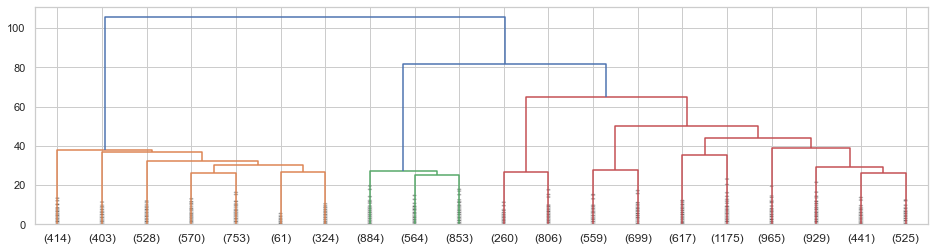

In [21]:
#Create a dendrogram

from scipy.cluster import hierarchy
fig, ax = plt.subplots(figsize=(16, 4))
dend = hierarchy.dendrogram(
     hierarchy.linkage(df3, method="ward"),
     truncate_mode="lastp",
     p=20,
     show_contracted=True,)

We obtain two clusters if we cut across the greatest vertical line. To determine the ideal number of clusters, make an elbow plot next.



Text(0, 0.5, 'Inertia')

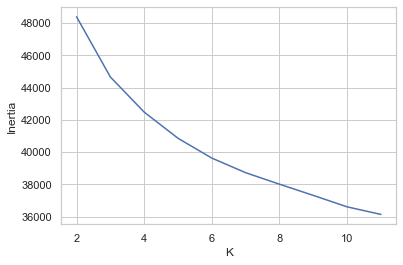

In [22]:
from sklearn.cluster import KMeans

inertias = []
sizes = range(2, 12)
for k in sizes:
    k2 = KMeans(random_state=42, n_clusters=k)
    k2.fit(df3)
    inertias.append(k2.inertia_)
fig, ax = plt.subplots(figsize=(6, 4))
pd.Series(inertias, index=sizes).plot(ax=ax)
ax.set_xlabel("K")
ax.set_ylabel("Inertia")

The inertia plot is pretty smooth but there seems to be a slight elbow around 3.

Plot inertia, the silhouette coefficient, the Calinski-Harabasz Index, and the Davies-Bouldin Index over a range of cluster sizes to see if there is a clear size of clusters for the data.

array([[<AxesSubplot:xlabel='k'>, <AxesSubplot:xlabel='k'>],
       [<AxesSubplot:xlabel='k'>, <AxesSubplot:xlabel='k'>]], dtype=object)

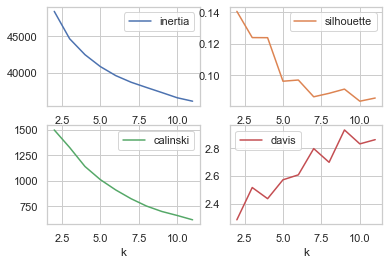

In [23]:
from sklearn import metrics
inertias = []
sils = []
chs = []
dbs = []
sizes = range(2, 12)
for k in sizes:
    k2 = KMeans(random_state=42, n_clusters=k)
    k2.fit(df3)
    inertias.append(k2.inertia_)
    sils.append(
        metrics.silhouette_score(df3, k2.labels_)
    )
    chs.append(
        metrics.calinski_harabasz_score(
            df3, k2.labels_
        )
    )
    dbs.append(
        metrics.davies_bouldin_score(
            df3, k2.labels_
        )
    )
fig, ax = plt.subplots(figsize=(6, 4))
(
    pd.DataFrame(
        {
            "inertia": inertias,
            "silhouette": sils,
            "calinski": chs,
            "davis": dbs,
            "k": sizes,
        }
    )
    .set_index("k")
    .plot(ax=ax, subplots=True, layout=(2, 2))
)

According to the inertia diagram, the elbow should be at 3. A k of 2 is displayed by the Calinski, Davis, and silhouette plots. Next, try various k values using Yellowbrick's silhouette plot tool.


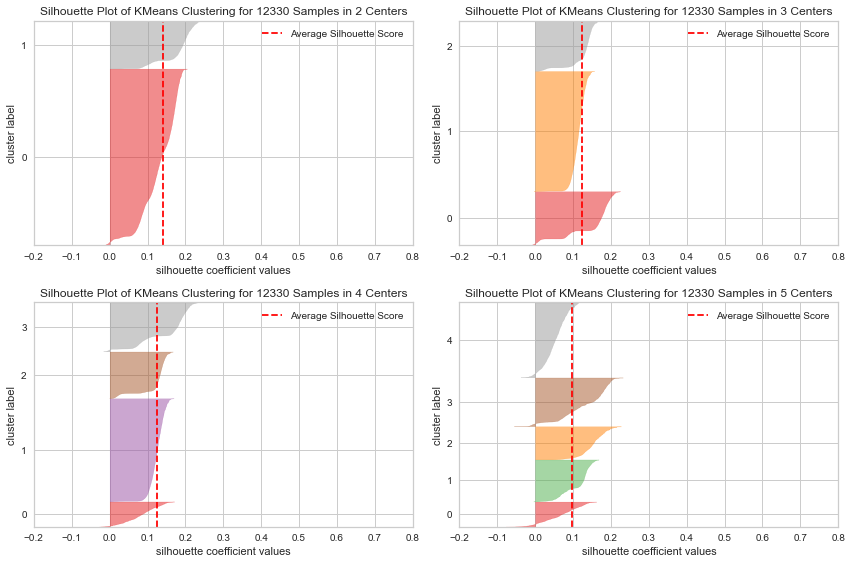

In [24]:
from yellowbrick.cluster.silhouette import (
    SilhouetteVisualizer,
)
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.reshape(4)
for i, k in enumerate(range(2, 6)):
    ax = axes[i]
    sil = SilhouetteVisualizer(
        KMeans(n_clusters=k, random_state=42),
        ax=ax,
    )
    sil.fit(df3)
    sil.finalize()
    ax.set_xlim(-0.2, 0.8)
plt.tight_layout()

For the silhouette plots, you we to make sure that each cluster bumps out above the average line, and that the cluster scores look decent. We think the first plot with 2 centers is the best plot that fits these criteria. After reviewing multiple plots, we believe that 2 clusters should be imposed on the data.

## Post-Clustering Exploratory Data Analysis

Use the grouping functionality in pandas to examine the differences in the clusters.

In [25]:
km = KMeans(n_clusters=2)
km.fit(df3)
labels = km.predict(df3)
pd.set_option('display.max_rows', None) 
print((df3.assign(cluster=labels)
    .groupby("cluster")
    .agg(["mean", "var"])
    .T))


cluster                                    0         1
Administrative                mean  0.020749  0.020696
                              var   0.001566  0.002738
Administrative_Duration       mean  0.393321  0.406816
                              var   0.182408  0.196606
Informational                 mean  0.003789  0.005511
                              var   0.000300  0.001792
Informational_Duration        mean  0.106806  0.091238
                              var   0.067821  0.059119
ProductRelated                mean  0.625162  0.598275
                              var   0.147146  0.160872
ExitRates                     mean  0.012802  0.018394
                              var   0.001870  0.003316
PageValues                    mean  0.062438  0.060546
                              var   0.035935  0.036927
SpecialDay                    mean  0.006589  0.008002
                              var   0.001513  0.002523
Month_Mar                     mean  0.156941  0.146192
          

It appears that the mean value for OperatingSystems_1, OperatingSystems_2, OperatingSystems_3, OperatingSystems_4, Browser_1, Browser_2, Browser_8 and TrafficType_13 varies quite a bit between cluster 0 and 1. 

Let's plot this so it'll be easier to see.

<AxesSubplot:>

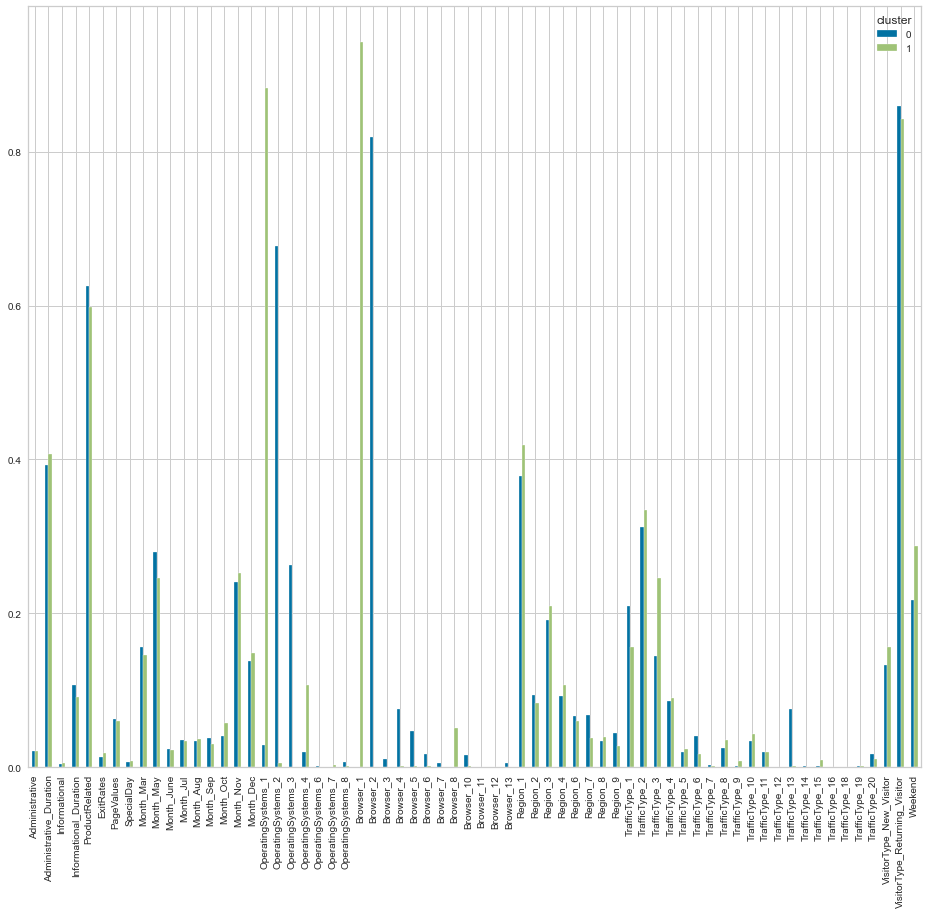

In [26]:
#Highlight the high and low values of each row.

fig, ax = plt.subplots(figsize=(16, 14))
(
    df3.assign(cluster=labels)
    .groupby("cluster")
    .mean()
    .T.plot.bar(ax=ax)
)

For the following attributes: OperatingSystems_1, OperatingSystems_2, OperatingSystems_3, OperatingSystems_4, Browser_1, Browser_2, Browser_8, and TrafficType_13, we can clearly detect variations between the means of clusters 0 and 1.

In [27]:
#Create a surrogate model to explain the clusters. 

from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt.fit(df3, labels)
for col, val in sorted(
    zip(df3.columns, dt.feature_importances_),
    key=lambda col_val: col_val[1],
    reverse=True,
):
    print(f"{col:10}{val:10.3f}")

Browser_1      0.927
Browser_8      0.064
Browser_2      0.008
OperatingSystems_1     0.000
Region_7       0.000
OperatingSystems_2     0.000
Administrative     0.000
Administrative_Duration     0.000
Informational     0.000
Informational_Duration     0.000
ProductRelated     0.000
ExitRates      0.000
PageValues     0.000
SpecialDay     0.000
Month_Mar      0.000
Month_May      0.000
Month_June     0.000
Month_Jul      0.000
Month_Aug      0.000
Month_Sep      0.000
Month_Oct      0.000
Month_Nov      0.000
Month_Dec      0.000
OperatingSystems_3     0.000
OperatingSystems_4     0.000
OperatingSystems_6     0.000
OperatingSystems_7     0.000
OperatingSystems_8     0.000
Browser_3      0.000
Browser_4      0.000
Browser_5      0.000
Browser_6      0.000
Browser_7      0.000
Browser_10     0.000
Browser_11     0.000
Browser_12     0.000
Browser_13     0.000
Region_1       0.000
Region_2       0.000
Region_3       0.000
Region_4       0.000
Region_6       0.000
Region_8       0.000
Regio

This shows that Browser_1, which also had a large difference in the mean, is very important.

## Clustering Output vs. Actual Labels

Let's fit the model with a 2 cluster setting. The value count of the points in each of the clusters will next be examined.

In [28]:
k = 2
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(df3)

In [29]:
y_pred

array([1, 0, 0, ..., 0, 0, 1], dtype=int32)

In [30]:
Revenue = pd.DataFrame(y_pred, columns = ['Revenue'])

Add the cluster output "Revenue" column to the data frame.

In [36]:
#Concatenate the data frame with the actual classification labels.
df4 = pd.concat([df3, Revenue], axis=1)

#Check results
df4.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ExitRates,PageValues,SpecialDay,Month_Mar,Month_May,...,TrafficType_14,TrafficType_15,TrafficType_16,TrafficType_18,TrafficType_19,TrafficType_20,VisitorType_New_Visitor,VisitorType_Returning_Visitor,Weekend,Revenue
0,0.000000,0.000000,0.000000,0.000000,0.147957,0.000528,0.988994,0.0,0,1,...,0,0,0,0,0,0,1,0,1,1
1,0.000000,0.000000,0.000000,0.000000,0.999994,0.003401,0.000000,0.0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,0.044264,0.414973,0.022132,0.907408,0.044264,0.000194,0.000000,0.0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.034226,0.989993,0.000000,0.000000,0.136905,0.000103,0.000000,0.0,0,0,...,0,0,0,0,0,0,0,1,0,1
4,0.014902,0.894129,0.014902,0.223532,0.387456,0.000057,0.000000,0.0,0,1,...,0,0,0,0,0,0,0,1,0,0


Take the Project2_Data_Labels.csv file from your Github repository and read its contents, then add them to a different new column in your Pandas data frame.

In [37]:
#Read in the csv from Github
V_Revenue = pd.read_csv("https://raw.githubusercontent.com/Sweety1893/DAV-5400/main/Project2_Data_Labels.csv?token=GHSAT0AAAAAACDKY3N7CANWBEKSMO7TZVISZF6JMAA", sep=',')
V_Revenue.rename(
    columns=({ 'Revenue': 'V_Revenue'}), 
    inplace=True,)

In [38]:
V_Revenue.head()

,V_Revenue
0,True
1,False
2,False
3,False
4,False


Convert V_Revenue values of True/False to 1/0

In [39]:
#Change the data type to int
V_Revenue = V_Revenue.astype(int)

#Replace True/False with 1/0
V_Revenue = V_Revenue.replace(to_replace = ['True','False'],value = [1,0])

#View the data frame to ensure the changes were made
V_Revenue.head()

,V_Revenue
0,1
1,0
2,0
3,0
4,0


Add V_Revenue to the data frame.

In [40]:
#Concatenate the data frame with the actual classification labels.
df5 = pd.concat([df4, V_Revenue], axis=1)

#Check results
df5.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ExitRates,PageValues,SpecialDay,Month_Mar,Month_May,...,TrafficType_15,TrafficType_16,TrafficType_18,TrafficType_19,TrafficType_20,VisitorType_New_Visitor,VisitorType_Returning_Visitor,Weekend,Revenue,V_Revenue
0,0.000000,0.000000,0.000000,0.000000,0.147957,0.000528,0.988994,0.0,0,1,...,0,0,0,0,0,1,0,1,1,1
1,0.000000,0.000000,0.000000,0.000000,0.999994,0.003401,0.000000,0.0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,0.044264,0.414973,0.022132,0.907408,0.044264,0.000194,0.000000,0.0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0.034226,0.989993,0.000000,0.000000,0.136905,0.000103,0.000000,0.0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,0.014902,0.894129,0.014902,0.223532,0.387456,0.000057,0.000000,0.0,0,1,...,0,0,0,0,0,0,1,0,0,0


* Calculate some basic comparative statistics between the two columns to demonstrate their similarities and differences.

Calculate the null error rate

In [41]:
#Null error rate
NRE = df5.V_Revenue.value_counts()[1]/(df5.V_Revenue.value_counts()[0] + df5.V_Revenue.value_counts()[1])
Error_Rate = 1 - NRE
Error_Rate

0.8452554744525548

In [42]:
df5.Revenue.value_counts()

0    9717
1    2613
Name: Revenue, dtype: int64

There are 9,717 data points belonging to cluster 0 and 2,613 data points belonging to cluster 1.

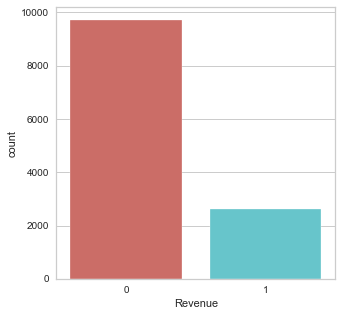

In [43]:
plt.figure(figsize=(5,5))
sns.countplot(x='Revenue', data=df5, palette='hls')
plt.show()

In [45]:
#Calculate the imbalance of TRevenue

count_no_purch = len(df4[df4['Revenue']==0])
count_purch = len(df4[df4['Revenue']==1])
pct_of_no_purch = count_no_purch/(count_no_purch + count_purch)
print("Percentage of no purchase is", round(pct_of_no_purch * 100))
pct_of_purch = count_purch/(count_no_purch + count_purch)
print("Percentage of made a purchase is", round(pct_of_purch * 100))

Percentage of no purchase is 79
Percentage of made a purchase is 21


We see that the clusters are imbalanced. Revenue predicted that 79% of website visitors did not make a purchase and 21% of website visitors did make a purchase.

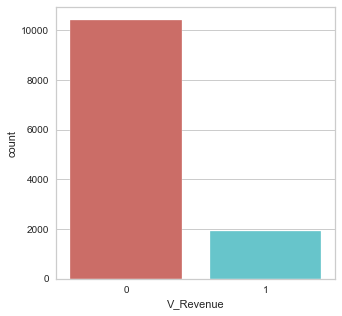

In [46]:
plt.figure(figsize=(5,5))
sns.countplot(x='V_Revenue', data=df5, palette='hls')
plt.show()

In [48]:
#Calculate the imbalance of V_Revenue

count_no_purch2 = len(df5[df5['V_Revenue']==0])
count_purch2 = len(df5[df5['V_Revenue']==1])
pct_of_no_purch2 = count_no_purch2/(count_no_purch2 + count_purch2)
print("Percentage of no purchase is", round(pct_of_no_purch2 * 100))
pct_of_purch2 = count_purch2/(count_no_purch2 + count_purch2)
print("Percentage of made a purchase is", round(pct_of_purch2 * 100))


Percentage of no purchase is 85
Percentage of made a purchase is 15


The class labels for V_Revenue show that 85% of website visitors did not make a purchase and 15% of website visitors did make a purchase.

Find the differences between Revenue and V_Revenue.

In [49]:
from sklearn.metrics import confusion_matrix, f1_score, classification_report, precision_score

print(classification_report(df5['V_Revenue'], df5['Revenue']))
print(confusion_matrix(df5['V_Revenue'], df5['Revenue']))

p = precision_score(df5['V_Revenue'], df5['Revenue'])
f = f1_score(df5['V_Revenue'], df5['Revenue'])
a = metrics.accuracy_score(df5['V_Revenue'], df5['Revenue'])

print("Precision:", p)
print("F1 score:", f) 
print("Accuracy:", a)

              precision    recall  f1-score   support

           0       0.84      0.79      0.81     10422
           1       0.15      0.20      0.17      1908

    accuracy                           0.70     12330
   macro avg       0.50      0.49      0.49     12330
weighted avg       0.74      0.70      0.71     12330

[[8197 2225]
 [1520  388]]
Precision: 0.1484883275928052
F1 score: 0.17164344171643442
Accuracy: 0.6962692619626926


According to the confusion matrix, there are 8,197 true negatives, 2,225 false positives, 1,520 false negatives, and 388 true positives. The clustering algorithm matched the class labels about 69.6% of the time. However, our classes are imbalanced, and the null error rate is 84.5% so 68.6% isn't actually that good. Also, our precision is only 14.8% and our F1 score is 17.2%. Clustering was not very good at predicting when a website visitor will make a purchase.



## SVM Modeling


Logistic Regression Feature Selection

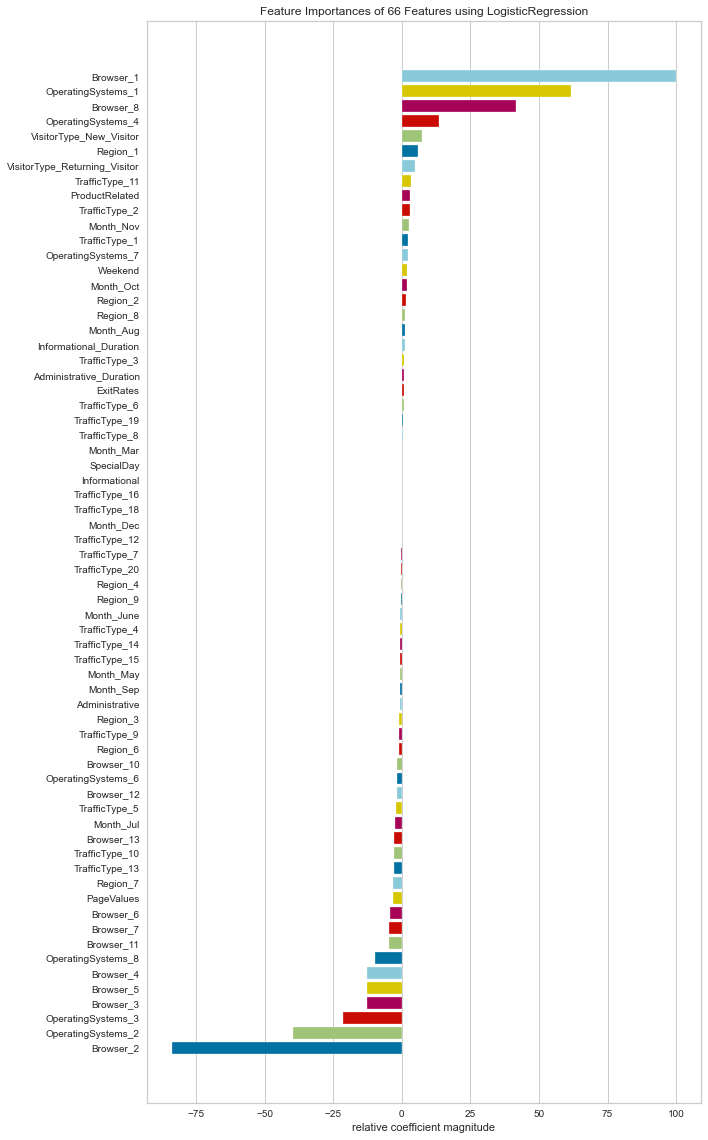

<AxesSubplot:title={'center':'Feature Importances of 66 Features using LogisticRegression'}, xlabel='relative coefficient magnitude'>

In [50]:
from yellowbrick.classifier import ROCAUC
from yellowbrick.contrib.wrapper import wrap
from yellowbrick.model_selection import FeatureImportances
from sklearn.linear_model import LogisticRegression

X = df5.iloc[:,0:66]
y = df5.Revenue

lr = LogisticRegression(random_state=42)
fig, ax = plt.subplots(figsize=(10, 16))
fi_viz = FeatureImportances(lr)
fi_viz.fit(X, y)
fi_viz.poof()

Browser_1, Browser_2, OperatingSystem_1, Browser_8, OperatingSystem_2, and OperatingSystem_3 were chosen via the logit regression feature selection. Additionally, as we showed above, these variables' mean changes from clusters 0 to 1 were the largest. This demonstrates that these are the variables we should incorporate into our model.

To decide whether to utilize SVM with a linear kernel, we must first establish if our data is linearly separable.

In [51]:
Xs = df5.iloc[:,0:66]
ys = df5.Revenue

#Prepare data for classification process
#Use 33% data to train 
#Use random state number 20 to make sure result is fixed 
from sklearn.model_selection import train_test_split
Xs_train, Xs_test, ys_train, ys_test = train_test_split(Xs, ys, test_size=0.33, random_state=20)

In [52]:
#Import SVM package
from sklearn.svm import SVC

#SVM model trained with a Linear kernel.
svm=SVC(random_state=42, kernel = "linear", C=1)
svm.fit(Xs_train,ys_train)
svm.score(Xs_train,ys_train)

0.9998789492797482

C is the penalty parameter, according to Machine Learning Pocket Reference Chapter 10. The decision boundary grows tighter (more overfitting) as the value decreases. The data are linearly separable if we can overfit a linear model. We obtained a 100% accuracy rate for SVM with a linear kernel when C=1. If our data can be separated linearly, we anticipate a 100% accuracy rate, leading us to believe that the linear kernel is the optimum approach for our SVM models.